<a href="https://colab.research.google.com/github/kkewat/Natural-Language-Processing/blob/main/Movie_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Importing the datasets
data = pd.read_csv('/content/IMDB Dataset.csv')

In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.shape

(50000, 2)

In [6]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Tokenization

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

In [10]:
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [11]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from bs4 import BeautifulSoup

In [12]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
#tokenization of text
tokenizers = ToktokTokenizer()
#setting english stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [14]:
def noise_removaltext(text):
  soup = BeautifulSoup(text,"html.parser")
  test = soup.get_text()
  text = re.sub(r'\[[^]]*\]', '', test)
  return text

In [15]:
#Applying the noise removal on review columns
data['review'] = data['review'].apply(noise_removaltext)

<ipython-input-14-a0efaeb9af83>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text,"html.parser")


In [16]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Stemming

In [17]:
#stemming the text
def stemmer(text):
  ps = PorterStemmer()
  text =' '.join([ps.stem(word) for word in text.split()])
  return text

In [18]:
#applying fuction on review column
data['review'] = data['review'].apply(stemmer)

In [19]:
data.head()

,review,sentiment
0,one of the other review ha mention that after ...,positive
1,a wonder littl production. the film techniqu i...,positive
2,i thought thi wa a wonder way to spend time on...,positive
3,basic there' a famili where a littl boy (jake)...,negative
4,"petter mattei' ""love in the time of money"" is ...",positive


Removing StopWords

In [20]:
def removing_stopwords(text, is_lower_case = False):
  #Tokenizer of Text
  tokenizer = ToktokTokenizer()
  #Setting english Stopwords
  tokens = tokenizer.tokenize(text)
  tokens = [i.strip() for i in tokens]
  if is_lower_case:
    filtokens = [i for i in tokens if tokens not in stopwords]
  else :
    filtokens = [i for i in tokens if i.lower() not in stopwords]
  filtered_texts = ' '.join(filtokens)
  return filtered_texts

In [21]:
# Applying the above function
data['review'] = data['review'].apply(removing_stopwords)

In [22]:
data.head()

,review,sentiment
0,one review ha mention watch 1 oz episod ' hook...,positive
1,wonder littl production. film techniqu veri un...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,basic ' famili littl boy ( jake ) think ' zomb...,negative
4,"petter mattei ' "" love time money "" visual stu...",positive


# **Train Test split**

In [24]:
#Splitting the training and testing data and seperating the reviews from target values
train_data = data.review[:30000]
test_data = data.review[30000:]

# **Bag of Words**

In [25]:
#count vecctorizer for bag of words
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train = cv.fit_transform(train_data)
#transformed test reviews
cv_test = cv.transform(test_data)

print('Bag of Words for train data ',cv_train.shape)
print('Bag of Words for test data ',cv_test.shape)

Bag of Words for train data  (30000, 4954557)
Bag of Words for test data  (20000, 4954557)


# **Tf IDF**

In [29]:
#Tf-IDF Vectorizer
tf = TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tf_train = tf.fit_transform(train_data)
# transformed the test reviews
tf_test = tf.transform(test_data)
# print the shape of tern frequency
print('Tf-Idf of train data',tf_train.shape)
print('Tf-Idf of test data',tf_test.shape)

Tf-Idf of train data (30000, 4954557)
Tf-Idf of test data (20000, 4954557)


# **Label Encoding**

In [30]:
label = LabelBinarizer()
# transform the sentiment Data
sentiment_data = label.fit_transform(data['sentiment'])
print('sentiment : ',sentiment_data.shape)

sentiment :  (50000, 1)


In [31]:
y_train = data.sentiment[:30000]
y_test = data.sentiment[30000:]

In [33]:
#Training the model
logistic = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#fitting the models for bag of words
lr_bow = logistic.fit(cv_train,y_train)
print(lr_bow)

#Fitting the model for tf-idf features
lr_tfidf = logistic.fit(tf_train,y_train)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


Predicting the Model for Bag of Words

In [37]:
bw_test = lr_bow.predict(cv_test)
print(bw_test)

['negative' 'negative' 'negative' ... 'negative' 'positive' 'positive']


Accuracy for Bag of Words

In [40]:
lr_bow_score = accuracy_score(bw_test,y_test)
print(lr_bow_score)

0.74255


Predicting the model for TF-IDF

In [38]:
tfidf_test = lr_tfidf.predict(tf_test)
print(tf_test)

  (0, 4656034)	0.4472135954999579
  (0, 3718484)	0.4472135954999579
  (0, 1564977)	0.4472135954999579
  (0, 240585)	0.4472135954999579
  (0, 170295)	0.4472135954999579
  (1, 4799758)	0.18257418583505533
  (1, 4759194)	0.18257418583505533
  (1, 4736892)	0.18257418583505533
  (1, 4384012)	0.18257418583505533
  (1, 4311759)	0.18257418583505533
  (1, 4284011)	0.18257418583505533
  (1, 4219645)	0.18257418583505533
  (1, 4215101)	0.18257418583505533
  (1, 4165323)	0.18257418583505533
  (1, 3886957)	0.18257418583505533
  (1, 3886956)	0.18257418583505533
  (1, 3825897)	0.18257418583505533
  (1, 3493745)	0.18257418583505533
  (1, 3280541)	0.18257418583505533
  (1, 3061703)	0.18257418583505533
  (1, 3058599)	0.18257418583505533
  (1, 2980137)	0.18257418583505533
  (1, 2968593)	0.18257418583505533
  (1, 2401288)	0.18257418583505533
  (1, 2102252)	0.18257418583505533
  :	:
  (19997, 318181)	0.21821789023599236
  (19997, 68276)	0.21821789023599236
  (19997, 67696)	0.21821789023599236
  (19998, 4232

Accuracy for tf-idf

In [41]:
tfidf_accuracy_score = accuracy_score(tfidf_test,y_test)
print(tfidf_accuracy_score)

0.7426


Visualising report for bag of words

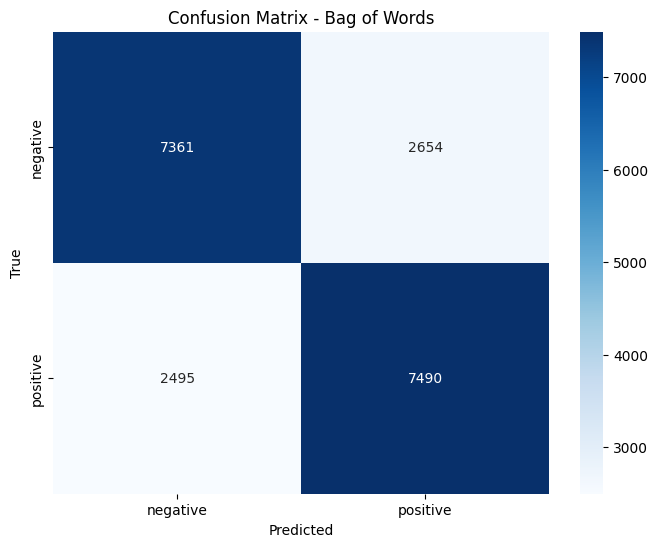

Classification Report - Bag of Words:
              precision    recall  f1-score   support

    negative       0.75      0.73      0.74     10015
    positive       0.74      0.75      0.74      9985

    accuracy                           0.74     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.74      0.74      0.74     20000



In [44]:
# Create confusion matrix
conf_matrix_bow = confusion_matrix(y_test, bw_test)

# Create classification report
class_report_bow = classification_report(y_test, bw_test)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Bag of Words')
plt.show()

print("Classification Report - Bag of Words:")
print(class_report_bow)

Generating report for tfidf

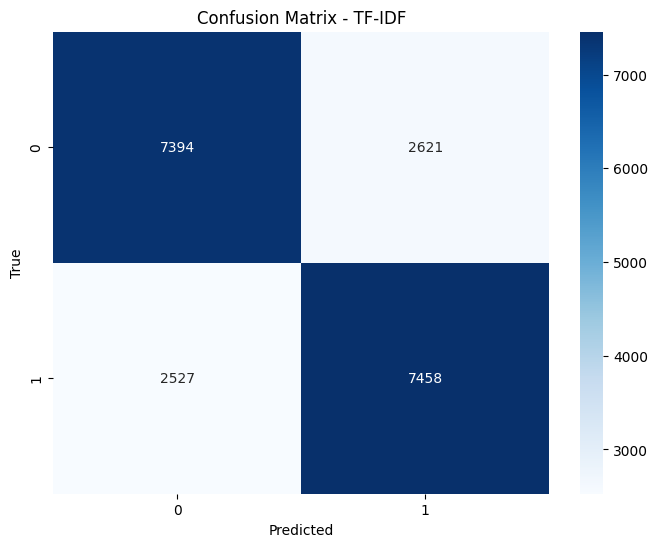

Classification Report - Tf-IDF:
              precision    recall  f1-score   support

    negative       0.75      0.74      0.74     10015
    positive       0.74      0.75      0.74      9985

    accuracy                           0.74     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.74      0.74      0.74     20000



In [47]:
# Create confusion matrix
conf_matrix_bow = confusion_matrix(y_test, tfidf_test)

# Create classification report
class_report_bow = classification_report(y_test, tfidf_test)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bow, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - TF-IDF')
plt.show()

print("Classification Report - Tf-IDF:")
print(class_report_bow)